In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import librosa
import librosa.display
import scipy.constants as const
import scipy
import IPython.display
from scipy.io import wavfile
from IPython.core.display import HTML
from __future__ import division
from tensorflow.python.platform import gfile
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
from tensorflow.python.tools import freeze_graph
import matplotlib.pyplot as plt

In [3]:
PATH_TEST = "./dataset/test"
PATH_TRAINING = "./dataset/train"
n_mfcc = 20
mfcc_start = 0
mfcc_end = 20
mfcc_stored = mfcc_end - mfcc_start
n_samples = 6

def load_vowel(folder, size=4):
    wav_files = os.listdir(folder)[0:size]
    dataset = np.ndarray(shape=(len(wav_files) * 8, mfcc_stored, n_samples), dtype=np.float32)
    num_files = 0
    for wav_file in wav_files:
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.125, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.25, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.375, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.5, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.625, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.75, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
        
        wave, sr = librosa.load(os.path.join(folder, wav_file), mono=True, offset=0.875, duration=0.125)
        mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)
        dataset[num_files,:,:] = mfccs[mfcc_start:mfcc_end, :] / 200
        num_files += 1
    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset


In [4]:
def load_wave_datasets(folder, size):
    vowels = os.listdir(folder)
    label = 0
    vowels_amount = len(vowels)
    datasets = np.ndarray(shape=(vowels_amount * size * 8, mfcc_stored, n_samples), dtype=np.float32)
    labels = np.ndarray(shape=(vowels_amount * size * 8), dtype=np.int)
    ind_start, ind_end = 0, size *8
    for vowel in vowels:
        vowel_folder = os.path.join(folder, vowel)
        vowel_dataset = load_vowel(vowel_folder, size)
        datasets[ind_start:ind_end,:,:] = vowel_dataset
        labels[ind_start:ind_end] = label
        ind_start += size * 8
        ind_end += size * 8
        label += 1
    print("Datasets Shape:", datasets.shape, labels.shape)
    return datasets, labels


In [5]:
def load_label_dataset(file, dataset_size):
    dataset = np.ndarray(shape=(dataset_size, 25, 13), dtype=np.float32)
    with open(file) as f:
        ind = 0;
        for line in f:
            if(ind >= dataset_size):
                break
            line_arr = np.asarray(eval(line), dtype=np.float32)
            dataset[ind,:,:] = line_arr
            ind+=1
    return dataset

def load_datasets(folder, dataset_size):
    vowels = os.listdir(folder)
    vowels_amount = len(vowels)
    label = 0
    datasets = np.ndarray(shape=(vowels_amount * dataset_size, 25, 13), dtype=np.float32)
    labels = np.ndarray(shape=(vowels_amount * dataset_size), dtype=np.int)
    ind_start = 0
    ind_end = dataset_size
    for vowel in vowels:
        vowel_file = os.path.join(folder, vowel)
        vowel_dataset = load_label_dataset(vowel_file, dataset_size)
        datasets[ind_start:ind_end,:,:] = vowel_dataset
        labels[ind_start:ind_end] = label
        ind_start += dataset_size
        ind_end += dataset_size
        label += 1
    return datasets, labels
datasets, labels = load_datasets(PATH_TRAINING, 36)
test_datasets, test_labels = load_datasets(PATH_TEST, 4)

permutation = np.random.permutation(labels.shape[0])
datasets = datasets[permutation,:,:]
labels = labels[permutation]

(6, 13)

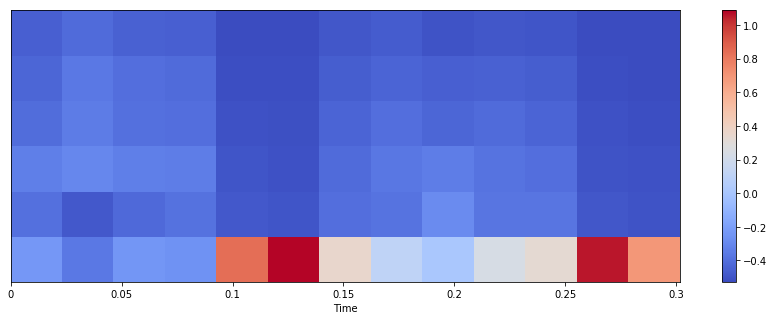

In [19]:
mfccs = datasets[7,:,:]
plt.figure(figsize=(15,5))
plt.title = "MFCC"

other = np.asarray([[-0.2329923, -0.3590909, -0.2369562, -0.2604672, 0.842925, 1.089494, 0.3511549, 0.1126428, 0.01449018, 0.2433557, 0.3314657, 1.060868, 0.6938599],[-0.3908163, -0.4822866, -0.415224, -0.3859359, -0.4824052, -0.4932116, -0.3946974, -0.3777816, -0.2860443, -0.3727128, -0.3740316, -0.4854029, -0.4959383],[-0.3317419, -0.3003647, -0.3366023, -0.3382937, -0.4932948, -0.5023192, -0.4116347, -0.3663481, -0.3424717, -0.3777007, -0.3983325, -0.4964407, -0.5056154],[-0.4064817, -0.3459327, -0.3906244, -0.3989318, -0.5048913, -0.5121234, -0.4361018, -0.3991171, -0.4277389, -0.4127695, -0.4332721, -0.5077406, -0.5149552],[-0.428248, -0.3603668, -0.3963854, -0.4094014, -0.5142543, -0.5200668, -0.4588054, -0.4350089, -0.4558163, -0.446616, -0.462816, -0.5160062, -0.5209382],[-0.4543934, -0.4073784, -0.447341, -0.4542996, -0.5222021, -0.5268316, -0.4835934, -0.4682081, -0.4954573, -0.4853754, -0.4893453, -0.5246474, -0.5268012]], dtype=np.float32)

librosa.display.specshow(other, x_axis='time')
plt.colorbar()
other.shape

In [7]:
num_labels = 6

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, 25 * 13)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels

train_dataset, train_labels = reformat(datasets, labels)
test_dataset, test_labels = reformat(test_datasets, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)

Training set (216, 325) (216, 6)


In [8]:
num_labels = 6
graph = tf.Graph()
with graph.as_default():

    tf_train_dataset = tf.placeholder(tf.float32,shape=(216, 325))
    tf_train_labels = tf.placeholder(tf.float32, shape=(216, num_labels))

    weights = tf.Variable(tf.truncated_normal([325, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))

    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf_train_labels, logits=logits))

    optimizer = tf.train.AdamOptimizer(0.005).minimize(loss)

    train_prediction = tf.nn.softmax(logits)
    
    tf_inference_input = tf.placeholder(tf.float32,shape=(1, 325), name="input")
    inf_logits = tf.matmul(tf_inference_input, weights) + biases
    inf_prediction = tf.nn.softmax(inf_logits, name="prediction")
    
    tf_test_input = tf.placeholder(tf.float32,shape=(24, 325))
    test_logits = tf.matmul(tf_test_input, weights) + biases
    test_prediction = tf.nn.softmax(test_logits)

In [9]:
num_steps = 2001

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    feed_dict = {tf_train_dataset : train_dataset, tf_train_labels : train_labels}
    for step in range(num_steps):
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, train_labels))
            test_predictions = session.run(test_prediction, feed_dict={tf_test_input: test_dataset})
            print('Test accuracy: %.1f%%' % accuracy(test_predictions, test_labels))
    saver = tf.train.Saver()
    last_checkpoint = './model.cptk'
    saver.save(session, last_checkpoint)
    tf.train.write_graph(session.graph_def, "./", 'raw_graph_def.pb', as_text=False)
    print("Saved checkpoint")

Initialized
Loss at step 0: 14.356624
Training accuracy: 14.4%
Test accuracy: 8.3%
Loss at step 100: 1.454201
Training accuracy: 43.5%
Test accuracy: 41.7%
Loss at step 200: 0.959681
Training accuracy: 61.1%
Test accuracy: 54.2%
Loss at step 300: 0.725877
Training accuracy: 70.8%
Test accuracy: 62.5%
Loss at step 400: 0.580987
Training accuracy: 79.6%
Test accuracy: 62.5%
Loss at step 500: 0.484219
Training accuracy: 85.6%
Test accuracy: 70.8%
Loss at step 600: 0.416679
Training accuracy: 88.4%
Test accuracy: 79.2%
Loss at step 700: 0.366356
Training accuracy: 90.7%
Test accuracy: 83.3%
Loss at step 800: 0.326743
Training accuracy: 90.7%
Test accuracy: 83.3%
Loss at step 900: 0.294325
Training accuracy: 92.1%
Test accuracy: 87.5%
Loss at step 1000: 0.267018
Training accuracy: 94.0%
Test accuracy: 91.7%
Loss at step 1100: 0.243511
Training accuracy: 94.4%
Test accuracy: 91.7%
Loss at step 1200: 0.222950
Training accuracy: 94.9%
Test accuracy: 91.7%
Loss at step 1300: 0.204764
Training a

In [10]:

freeze_graph.freeze_graph(input_graph = './raw_graph_def.pb',
              input_binary = True,
              input_checkpoint = last_checkpoint,
              output_node_names = "prediction",
              output_graph = './model.bytes' ,
              clear_devices = True, initializer_nodes = "",input_saver = "",
              restore_op_name = "save/restore_all", filename_tensor_name = "save/Const:0")

INFO:tensorflow:Restoring parameters from ./model.cptk
INFO:tensorflow:Froze 2 variables.
Converted 2 variables to const ops.
